<a href="https://colab.research.google.com/github/Cabranet/cabranet-notebooks/blob/main/GeneticDataLily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicing making graphs using data from Lily's dissertation last year

It took me a long time and lots of help from ChatGPT to work out that I needed to reset the index of grouped data I extracted from the raw CSV file.

### As always I started by importing all the data analysis libraries.
I import Pandas, Numpy, MatPlotLib and I've also been experimenting with Seaborn, so I've imported that too.

In [13]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gdspec
import numpy as np

###Importing the data and creating data frames for the subplots
After importing the data, I find it useful to to print out the data types and have a look at the data description.

In [14]:
g_data = pd.read_csv('/content/sample_data/lily_results.csv')
print(g_data.dtypes)
print(g_data.describe())

Well            object
Sample Name     object
Target Name     object
CT             float64
dtype: object
              CT
count  37.000000
mean   30.225617
std     4.711028
min    23.702511
25%    25.967415
50%    32.373566
75%    33.812901
max    37.046570


In [15]:
# Create filtered datasets
ax1_data = g_data.groupby('Target Name')['CT'].mean().reset_index()
ax2_data = g_data[g_data['Target Name'] == 'U6']
ax3_data = g_data[g_data['Target Name'] == 'MMP14']
ax4_data = g_data[g_data['Target Name'] == 'MMP13']
ax5_data = g_data[g_data['Target Name'] == 'MMP17']

print(ax1_data)

  Target Name         CT
0       MMP10  32.967489
1       MMP13  35.747783
2       MMP14  27.073428
3       MMP17  34.540355
4        MMP9  26.263181
5          U6  23.841104


###Creating the subplots and plotting the bar charts

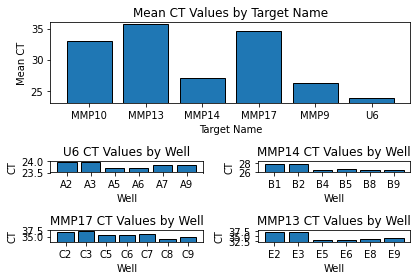

In [16]:
fig = plt.figure()
gs = gdspec.GridSpec(4, 2)

# Create the subplots
ax1 = plt.subplot(
        gs[:2, :],
        ylabel='Mean CT',
        xlabel='Target Name',
        ylim=[23, 36],
        title='Mean CT Values by Target Name')

ax2 = plt.subplot(
        gs[2, 0],
        ylabel='CT',
        xlabel='Well',
        ylim=[23.5, 24],
        title='U6 CT Values by Well'
        )
ax3 = plt.subplot(
        gs[2, 1],
        ylabel='CT',
        xlabel='Well',
        ylim=[26, 28.5],
        title='MMP14 CT Values by Well'
        )
ax4 = plt.subplot(
        gs[3, 0],
        ylabel='CT',
        xlabel='Well',
        ylim=[33, 37.5],
        title='MMP17 CT Values by Well'
        )
ax5 = plt.subplot(
        gs[3, 1],
        ylabel='CT',
        xlabel='Well',
        ylim=[32, 38],
        title='MMP13 CT Values by Well'
        )

# Create filtered datasets
ax1_data = g_data.groupby('Target Name')['CT'].mean().reset_index()
ax2_data = g_data[g_data['Target Name'] == 'U6']
ax3_data = g_data[g_data['Target Name'] == 'MMP14']
ax4_data = g_data[g_data['Target Name'] == 'MMP13']
ax5_data = g_data[g_data['Target Name'] == 'MMP17']

# Create the bar charts
ax1.bar(
        ax1_data['Target Name'],
        ax1_data['CT'],
        edgecolor='black')
ax2.bar(
        ax2_data['Well'],
        ax2_data['CT'],
        edgecolor='black')
ax3.bar(
        ax3_data['Well'],
        ax3_data['CT'],
        edgecolor='black')
ax4.bar(
        ax4_data['Well'],
        ax4_data['CT'],
        edgecolor='black')
ax5.bar(
        ax5_data['Well'],
        ax5_data['CT'],
        edgecolor='black')


# Prevent the axes from overlapping
fig.set_tight_layout(True)

# Show plots
plt.show()